In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import load
from numpy import expand_dims
from random import choice
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.decomposition import  PCA, TruncatedSVD

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_excel('Train_Dataset.xlsx',header=None)
df.head(5)
print(df.info())
df.rename(columns = {560:'Target'}, inplace=True)
print(df['Target'].unique())
df.describe()
df.isnull().any().any()
df.isnull().sum().sum()
new_df = df['Target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Columns: 561 entries, 0 to 560
dtypes: float64(560), int64(1)
memory usage: 4.3 MB
None
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


## Creating random sample for Subject Target

In [99]:
from random import seed
from random import choice
#seed random number generator
#seed(1) - Helps generate one similiar constant type of output
#prepare a sequence
sequence = [i for i in range(1, 22)]
print(sequence)
for _ in range(3):
    selection = choice(sequence)
    print(selection)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
5
2
11


# Subject 1 Preparation For Train Dataset

In [101]:
df_1 = df[df['Target']==1]
df_3 = df[df['Target']==3]
df_8 = df[df['Target']==8]
df_10 = df[df['Target']==10]

df1 = pd.concat([df_1,df_3,df_8,df_10],axis=0)
df1
df1.isnull().sum().max()
df1.describe()
df1['Target'].unique()


array([ 1,  3,  8, 10], dtype=int64)

In [102]:
df1['Target'].value_counts()

10    48
8     48
3     47
1     44
Name: Target, dtype: int64

## Setting Real vs Imposters

In [103]:
df1['Target'] = df1['Target'].map({1 : 1, 3: 0, 8: 0, 10: 0})
df1['Target'].unique()
df1

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,-0.975781,0.750259,-0.783084,0.107351,0.298723,-0.018886,-0.137858,-0.006761,0.091480,0.027464,...,-0.914826,-0.928113,-0.924180,-0.910557,-0.910459,-0.909799,-0.926136,-0.912968,-0.944124,0
467,-0.994413,0.658457,-0.518640,-0.293655,0.094960,0.164786,0.014968,-0.067401,-0.007756,0.069982,...,-0.899155,-0.894583,-0.875977,-0.876368,-0.900878,-0.913254,-0.937634,-0.945646,-0.950934,0
468,-0.978583,0.720924,-0.877549,0.362357,0.219469,-0.220478,-0.155672,0.119847,0.103633,-0.018596,...,-0.913558,-0.921570,-0.922638,-0.920473,-0.941447,-0.923232,-0.924869,-0.866950,-0.943609,0
469,-0.969244,0.751271,-0.834199,0.216355,0.275451,-0.147865,-0.200408,0.063119,0.150510,0.024608,...,-0.914571,-0.908007,-0.924285,-0.892913,-0.916112,-0.906646,-0.940115,-0.815421,-0.920873,0


## Applying StandardScaler to Dataset

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Feat = df1.drop('Target',axis=1)
scaler.fit(X_Feat)
scaled_data = scaler.transform(X_Feat)
scaled_data

array([[-0.24575558,  0.12012151, -0.93679758, ...,  0.06423671,
        -0.15319085, -0.09600715],
       [-0.22855304, -0.57900465,  0.75086054, ..., -0.17773582,
        -0.31605236, -0.20906726],
       [-0.16358598, -0.15792081,  0.07787616, ..., -0.19500237,
        -0.29774321, -0.26731972],
       ...,
       [-0.07240361,  0.39393999, -0.9611228 , ..., -0.19208144,
        -0.06491391, -0.21421083],
       [ 0.07816438,  0.58633336, -0.78458711, ..., -0.25726922,
         0.14510695, -0.11841778],
       [-0.05561386,  0.1762363 , -0.23970848, ..., -0.1561964 ,
        -0.24269596, -0.23856461]])

## Feature Reductionality -  PCA 

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(187, 30)

Text(0.5, 1.0, 'Train Dataset Representation')

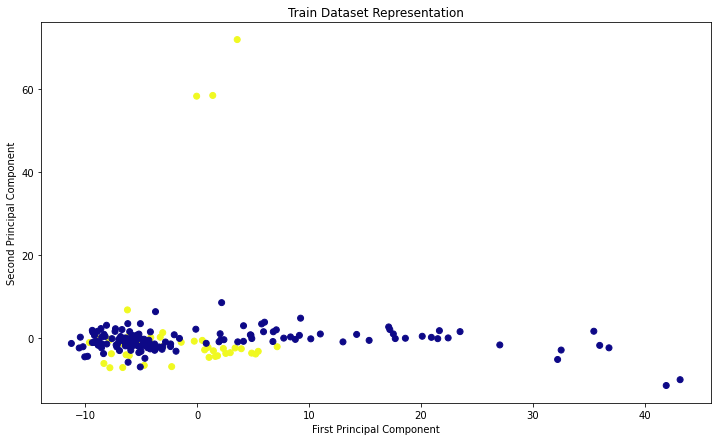

In [120]:
plt.figure(figsize=(12,7))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Train Dataset Representation')

# Loading Dataset for Subject 1 Testing

In [108]:
df_test = pd.read_excel('Test_Dataset.xlsx',header=None)
df_test.rename(columns = {560:'Target'}, inplace=True)
df_test


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,-0.971732,0.596789,-0.838813,0.670075,-0.488917,-0.232395,0.404837,0.208117,-0.262806,-0.134059,...,-0.832218,-0.775640,-0.700669,-0.770811,-0.860524,-0.695444,-0.891418,-0.860975,-0.892860,21
483,-0.995832,0.729836,-0.752420,0.220511,0.277432,-0.104830,-0.128755,0.094603,0.116230,-0.046582,...,-0.879794,-0.662750,-0.620293,-0.810737,-0.897448,-0.643716,-0.885876,-0.780866,-0.888188,21
484,-0.891743,0.649259,-0.787650,0.623803,-0.243332,-0.381183,0.169853,0.325229,-0.014099,-0.224830,...,-0.811808,-0.786571,-0.857872,-0.797982,-0.563927,-0.810468,-0.906092,-0.836202,-0.914088,21
485,-0.965976,0.695892,-0.705969,-0.163699,0.250007,0.090883,-0.164206,-0.153858,0.029542,0.126786,...,-0.838922,-0.735318,-0.800117,-0.848327,-0.573912,-0.771960,-0.879418,-0.817533,-0.854744,21


In [109]:
df_1 = df_test[df_test['Target']==1]
df_3 = df_test[df_test['Target']==3]
df_8 = df_test[df_test['Target']==8]
df_10 = df_test[df_test['Target']==10]


df1_test = pd.concat([df_1,df_3,df_8,df_10],axis=0)
df1_test

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-0.989538,0.750092,-0.772495,0.197461,0.382972,0.003608,-0.170413,-0.011901,0.133345,0.093726,...,-0.930380,-0.897204,-0.928094,-0.890919,-0.883953,-0.924215,-0.934380,-0.863415,-0.931116,10
224,-0.986073,0.793491,-0.838872,0.634392,-0.035230,-0.335249,-0.031203,0.125435,-0.032775,-0.038257,...,-0.918512,-0.929156,-0.956978,-0.938975,-0.932511,-0.941641,-0.935447,-0.928926,-0.943135,10
225,-0.990666,0.612419,-0.275385,-0.237670,0.063459,0.182562,0.082222,-0.052941,-0.072827,-0.002642,...,-0.894557,-0.897913,-0.902647,-0.903113,-0.899331,-0.880259,-0.895971,-0.895034,-0.873894,10
226,-0.998687,0.511536,-0.279748,-0.357638,-0.120391,0.115768,0.170811,0.095479,0.017731,0.012359,...,-0.746154,-0.778428,-0.900481,-0.679400,-0.858563,-0.825538,-0.922071,-1.003659,-0.767977,10


In [110]:
df1_test['Target'].unique()

array([ 1,  3,  8, 10], dtype=int64)

In [111]:
df1_test['Target'] = df1_test['Target'].map({1 : 1, 3: 0, 8: 0, 10: 0})

In [112]:
df1_test['Target'].unique()

array([1, 0], dtype=int64)

## Applying StandardScaler to Dataset

In [113]:
scaler = StandardScaler()
X_Feat_test = df1_test.drop('Target',axis=1)
scaler.fit(X_Feat_test)
scaled_data_test = scaler.transform(X_Feat_test)
scaled_data_test

array([[-0.58758457,  0.58157642, -1.00026884, ..., -0.60915745,
        -0.63411899, -0.60945829],
       [-0.53469435,  0.66135335, -0.94437025, ..., -0.62856141,
        -0.60684823, -0.60711152],
       [-0.5978389 ,  0.58520095, -0.90215006, ..., -0.62466572,
        -0.60965132, -0.61316418],
       ...,
       [-0.61790874,  0.28757686,  0.64830715, ..., -0.54768129,
        -0.57139577, -0.51612691],
       [-0.6374011 , -0.01609296,  0.63531986, ..., -0.57872838,
        -0.70194813, -0.39035841],
       [-0.62935547,  0.83147026, -0.11494476, ..., -0.628406  ,
        -0.27490562, -0.60021763]])

# Feature Reductionality -  PCA 

In [114]:
pca = PCA(n_components=30)
pca.fit(scaled_data_test)
x_pca_test = pca.transform(scaled_data_test)
x_pca_test.shape

(94, 30)

In [115]:
x_pca_test[4]

array([-8.6706749 , -2.8567399 , -0.4659204 , -5.9030135 ,  1.53591919,
        4.1746335 , -8.06525242,  3.77202719, -0.11757546,  0.67099237,
       -2.51393531, -3.39837186, -1.33911166, -1.68108385,  2.62008065,
        0.5220396 ,  0.59712008,  0.55785408,  1.35878374, -2.90613806,
        2.59342289, -5.77454985, -3.1714183 ,  0.78166237,  2.27748006,
       -0.07110708,  2.25969493, -4.57129209, -1.9478019 ,  0.19607745])

Text(0.5, 1.0, 'Test Dataset Representation')

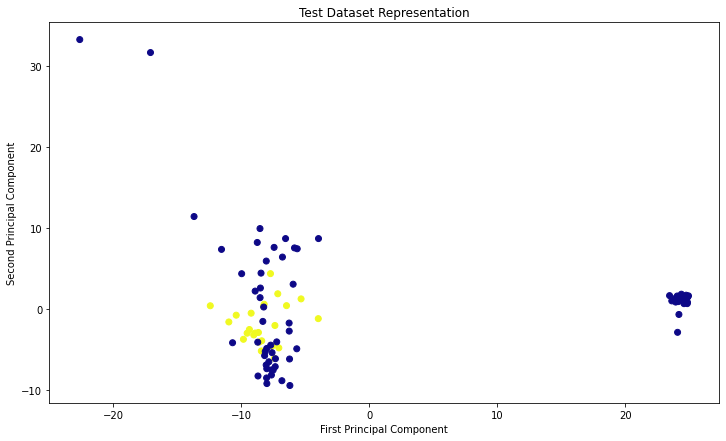

In [119]:
plt.figure(figsize=(12,7))
plt.scatter(x_pca_test[:,0],x_pca_test[:,1],c=df1_test['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Test Dataset Representation')

# Machine Learning Application

## Assigning Train and test Labels to Loaded Dataset

In [121]:
X_test = x_pca_test
y_test = df1_test['Target']

X_train = x_pca
y_train = df1['Target']

## Our data is already scaled we should split our training and test sets

In [122]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [123]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[34  0]
 [ 4  9]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       1.00      0.69      0.82        13

    accuracy                           0.91        47
   macro avg       0.95      0.85      0.88        47
weighted avg       0.92      0.91      0.91        47



In [124]:
score_test = accuracy_score(y_test,predictions)
score_test

0.9148936170212766

# Various Classifier Libraries Score Effect on Dataset

In [125]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [130]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=7)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 96.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 91.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 81.0 % accuracy score
